## Reto 3: Describiendo histogramas

### 1. Objetivos:
    - Generar histogramas y caracterizarlos utilizando las herramientas que hemos aprendido hasta el momento

---
    
### 2. Desarrollo:

#### a) Pima Indians Diabetes Database

Vamos a analizar un conjunto de datos que contiene datos acerca del estado de salud de mujeres mayores de 21 años de ascendencia [pima](https://es.wikipedia.org/wiki/Pueblo_pima). El conjunto también tiene una columna 'outcome' que indica si las pacientes fueron diagnosticadas con diabetes o no. Puedes ver la descripción completa [aquí](https://www.kaggle.com/uciml/pima-indians-diabetes-database).  El dataset está guardado con el nombre de `diabetes-clean.csv`.

- Todas las variables independientes en este dataset son numéricas. Genera histogramas de todas las variables independientes para observar la distribución de estas variables. Un valor aceptable para el número de `bins` es `50`. Después de generar el histograma, caracterízalo con una descripción utilizando los términos que has aprendido en esta sesión.

- Intenta también discernir a simple vista la asimetría y curtosis de tus histogramas, y después confirma tus hipótesis utilizando las funciones `kurtosis` y `skew` del módulo `scipy.stats`.

- Ve si te es posible identificar la cantidad y magnitud de los valores atípicos usando histogramas. ¿Cuál ha sido la técnica que te ha facilitado más la identificación de valores atípicos? ¿Boxplots, tablas de frecuencias o histogramas?

Comenta con la experta y con tus compañeros por qué crees que esas variables tengan la distribución que tienen.

In [11]:

import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

sns.set(style='white')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto diabetes-clean.csv',index_col=0)

In [10]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.size

6912

In [13]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ipython-input-15-05e9d1e09dc6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pregnancies']);


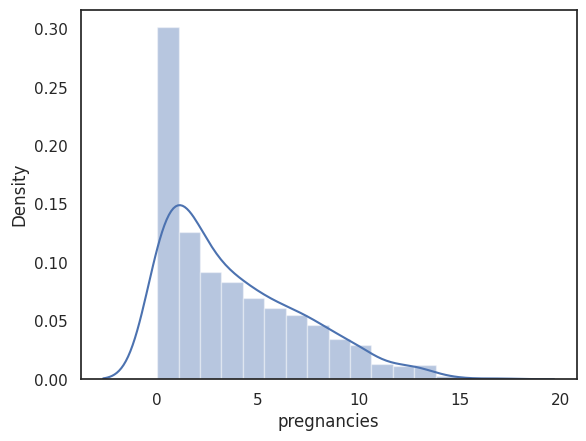

In [15]:
sns.distplot(df['pregnancies']);

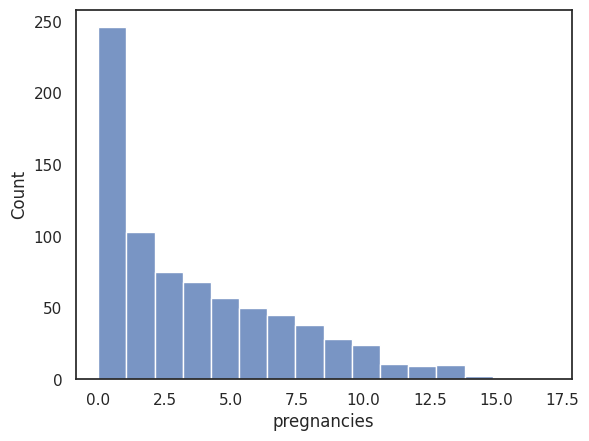

In [19]:
sns.histplot(df['pregnancies']);

In [20]:
df.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')

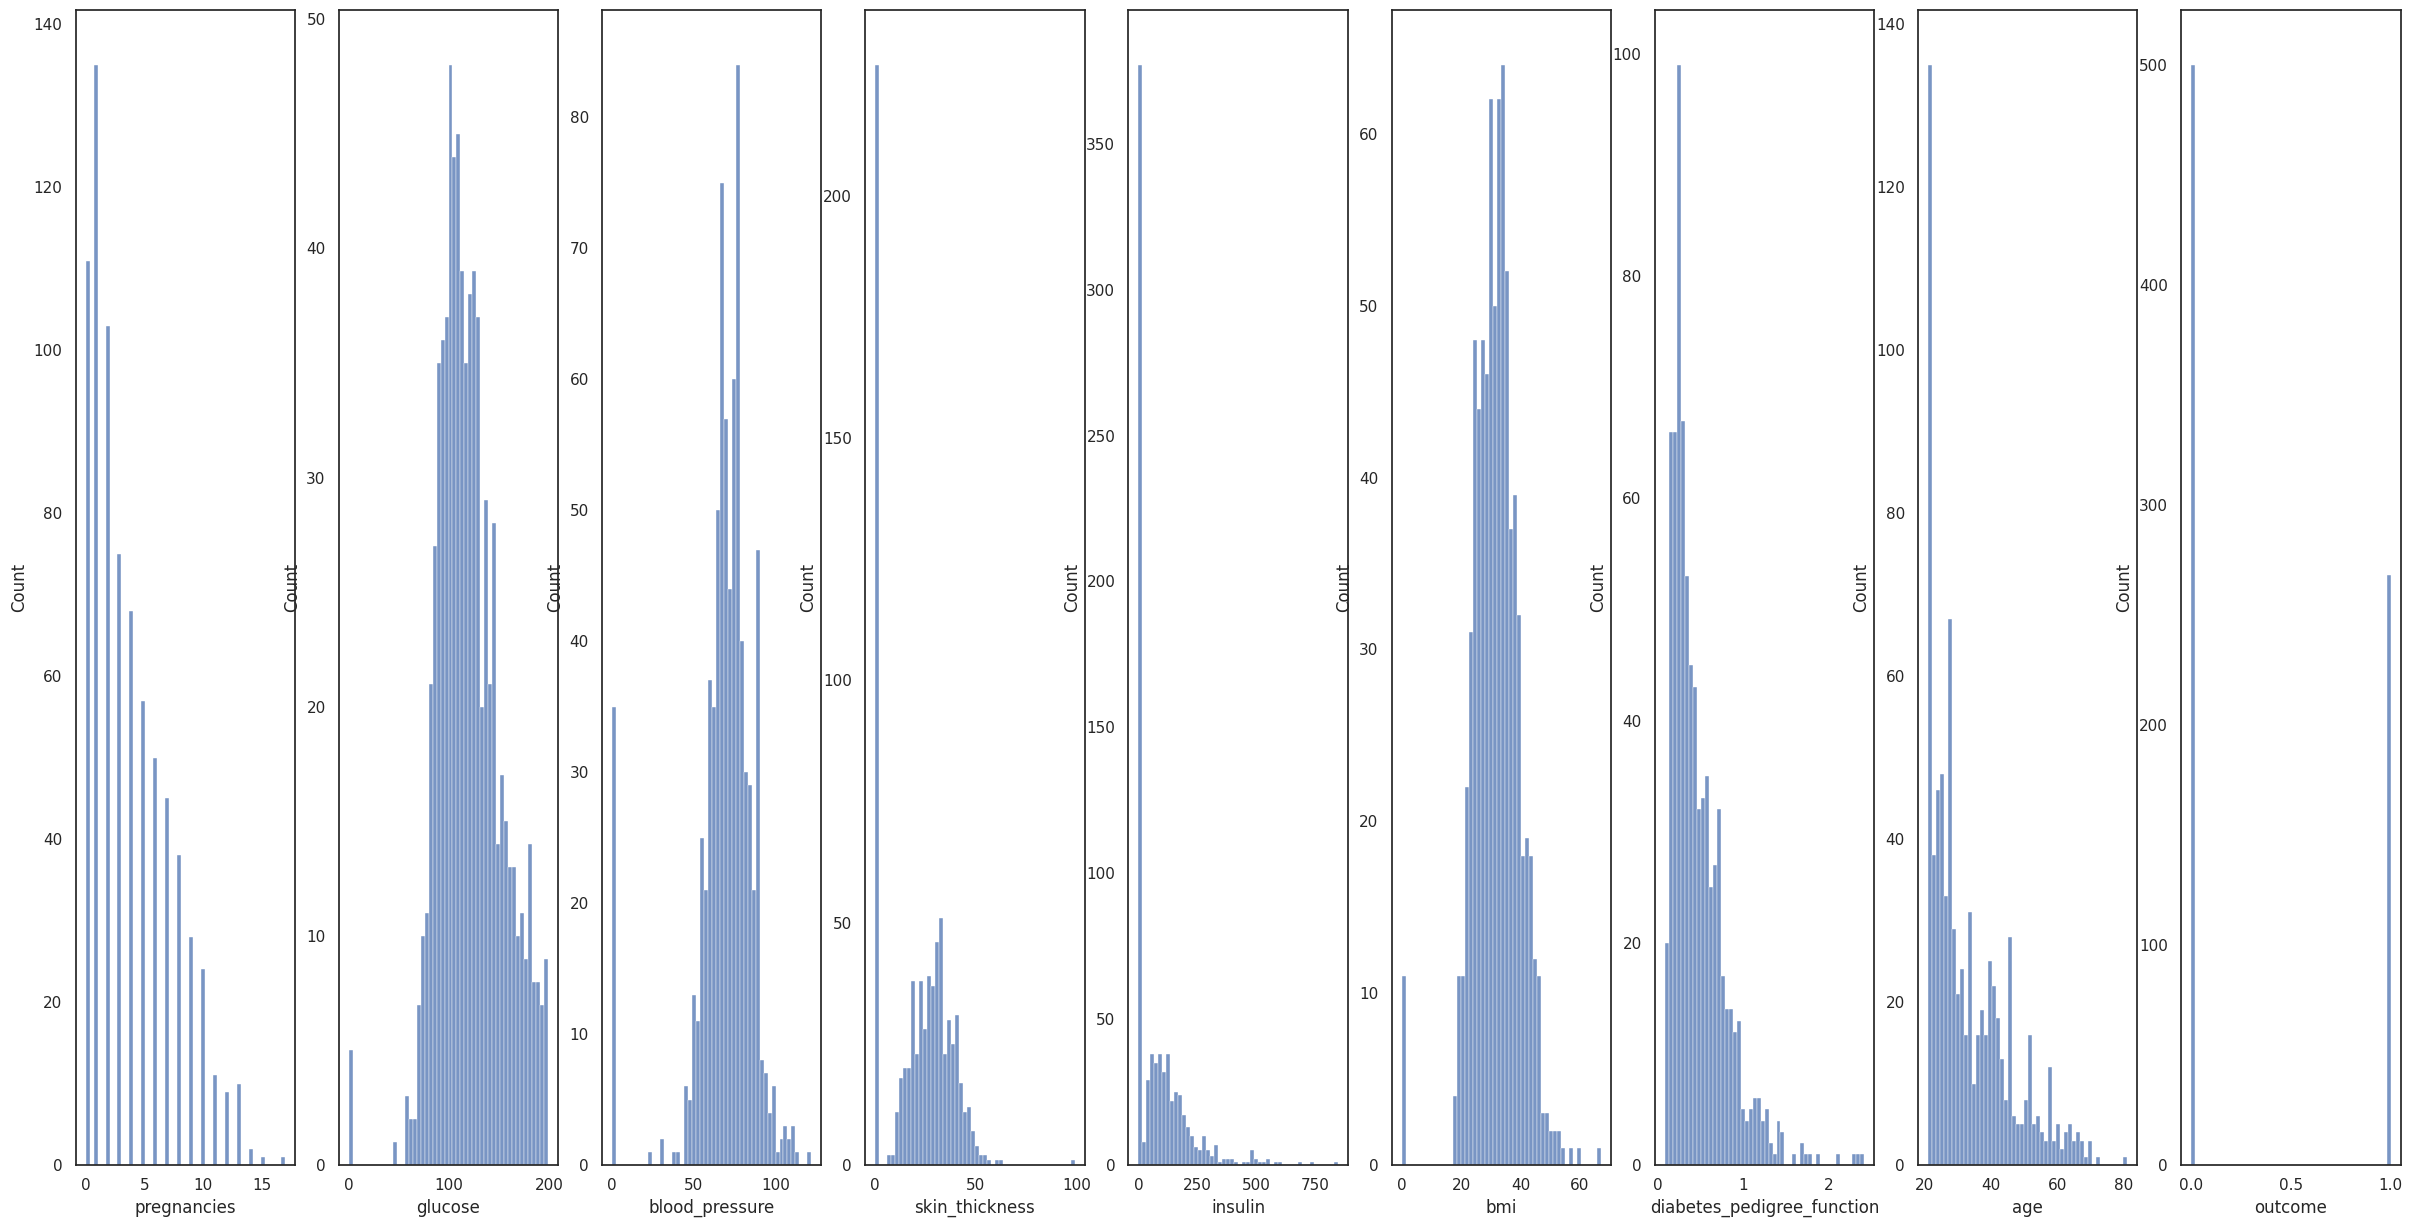

In [32]:

fig, axes = plt.subplots(ncols=len(df.columns), figsize=(30,15))
for ax, i in zip(axes,df.columns) :
  sns.histplot(df[i], bins=50, ax=ax);

plt.show();

In [39]:
for i in df.columns :
  print(f'--------------- Columna: {i} ---------------')
  print(f'Curtosis: {kurtosis(df[i])}')
  print(f'Asimetría: {skew(df[i])}')

--------------- Columna: pregnancies ---------------
Curtosis: 0.15038273760948462
Asimetría: 0.8999119408414357
--------------- Columna: glucose ---------------
Curtosis: 0.6288133337300685
Asimetría: 0.17341395519987735
--------------- Columna: blood_pressure ---------------
Curtosis: 5.138690662525438
Asimetría: -1.8400052311728738
--------------- Columna: skin_thickness ---------------
Curtosis: -0.5244944887652805
Asimetría: 0.109158762323673
--------------- Columna: insulin ---------------
Curtosis: 7.159574916971424
Asimetría: 2.2678104585131753
--------------- Columna: bmi ---------------
Curtosis: 3.2612574203612645
Asimetría: -0.42814327880861786
--------------- Columna: diabetes_pedigree_function ---------------
Curtosis: 5.550792047551205
Asimetría: 1.9161592037386292
--------------- Columna: age ---------------
Curtosis: 0.6311769413798585
Asimetría: 1.127389259531697
--------------- Columna: outcome ---------------
Curtosis: -1.5983283582089547
Asimetría: 0.63377570306145